In [1]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
sampling_rate = 128  # Hz

# Load data item containing the PPG, HR, and IMU signals from all phases
data = np.load('mhealth24_data_public.npy', allow_pickle=True).item() # now it is a dict

print('Keys for data:', data.keys())

# Example to extract the data from phase 0
phase0_data = data['phase 0']
print('Keys for phase 0:', phase0_data.keys())

# Get the individual signals from phase 0
ppg_phase0 = phase0_data['PPG wrist']
ref_hr_phase0 = phase0_data['ground truth HR']  # only available for phase 0, 2, and 4 (training data)
IMU_X_phase0 = phase0_data['IMU X wrist']
IMU_Y_phase0 = phase0_data['IMU Y wrist']
IMU_Z_phase0 = phase0_data['IMU Z wrist']

Keys for data: dict_keys(['phase 0', 'phase 1', 'phase 2', 'phase 3', 'phase 4', 'phase 5'])
Keys for phase 0: dict_keys(['ground truth HR', 'PPG wrist', 'IMU X wrist', 'IMU Y wrist', 'IMU Z wrist'])


first step is to create training data set

In [ ]:
#training data set consists of 0,2,4


In [7]:
phase0_data = data['phase 0']
print('Keys for phase 0:', phase0_data.keys())

phase2_data = data['phase 2']
print('Keys for phase 2:', phase2_data.keys())

phase4_data = data['phase 4']
print('Keys for phase 4:', phase4_data.keys())


ppg_phase0 = phase0_data['PPG wrist']
ppg_phase2 = phase2_data['PPG head']
ppg_phase4 = phase4_data['PPG head']

Keys for phase 0: dict_keys(['ground truth HR', 'PPG wrist', 'IMU X wrist', 'IMU Y wrist', 'IMU Z wrist'])
Keys for phase 2: dict_keys(['ground truth HR', 'PPG head', 'IMU X head', 'IMU Y head', 'IMU Z head'])
Keys for phase 4: dict_keys(['ground truth HR', 'PPG head', 'IMU X head', 'IMU Y head', 'IMU Z head'])


In [8]:
def plot_signal(signal, title, ylabel, sampling_rate=128):
    x = np.linspace(0, len(signal) / sampling_rate, len(signal))
    t = pd.to_datetime(x, unit='s')

    fig, ax = plt.subplots()
    ax.plot(t, signal)
    ax.set_title(title)
    ax.set_xlabel('Time [min:sec]')
    ax.set_ylabel(ylabel)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%M:%S'))
    plt.show()

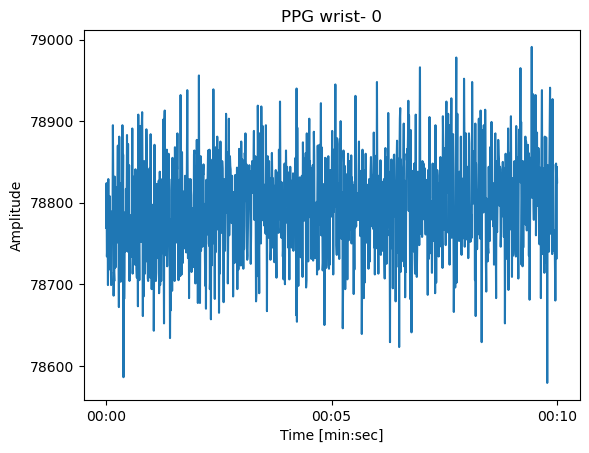

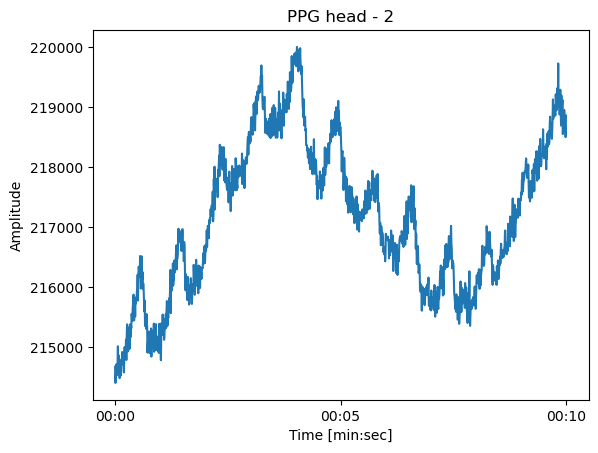

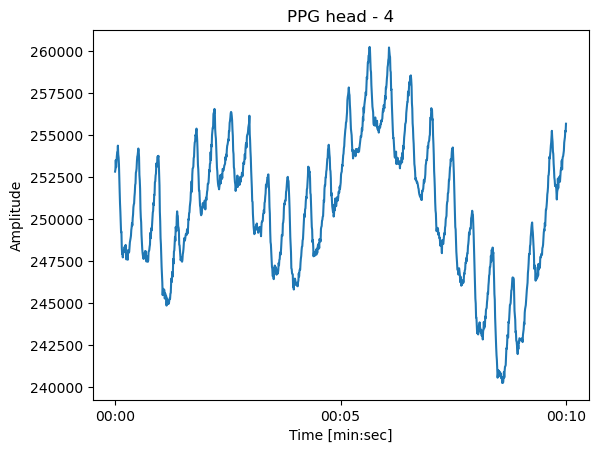

In [9]:
plot_window_start = 0  # in seconds
plot_window_end = 10  # in seconds

plot_signal(ppg_phase0[plot_window_start*sampling_rate:plot_window_end*sampling_rate], 'PPG wrist - 0', 'Amplitude')

plot_signal(ppg_phase2[plot_window_start*sampling_rate:plot_window_end*sampling_rate], 'PPG head - 2', 'Amplitude')

plot_signal(ppg_phase4[plot_window_start*sampling_rate:plot_window_end*sampling_rate], 'PPG head - 4', 'Amplitude')